# **I &nbsp;&nbsp;&nbsp; Import Libraries**

In [2]:
import struct
import numpy as np
import matplotlib.pyplot as plt

# **II &nbsp;&nbsp;&nbsp; Preprocessing**

## **1 &nbsp;&nbsp;&nbsp; Helper Functions**

In [3]:
def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        if magic != 2051:
            print(f"Magic number {magic} không hợp lệ trong file ảnh MNIST.")
            return None
        
        buf = f.read(rows * cols * num_images)
        data = np.frombuffer(buf, dtype=np.uint8)
        data = data.reshape(num_images, rows, cols)
        return data
    
def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))
        if magic != 2049:
            print(f"Magic number {magic} không hợp lệ trong file nhãn MNIST.")
            return None
        
        buf = f.read(num_labels)
        labels = np.frombuffer(buf, dtype=np.uint8)
        return labels

def show_mnist_image(imgs, labels):
    plt.figure(figsize=(12,4))
    for i in range(10):
        plt.subplot(1, 10, i+1)  
        plt.imshow(imgs[i], cmap='gray')
        plt.axis('off')          
         
    plt.tight_layout()
    plt.show()
    
def plot_distribution(counts, labels):
    plt.figure(figsize=(7,4))
    
    bars = plt.bar(labels, counts)
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{counts[i]}",
            ha='center', va='bottom', fontsize=9
        )
        
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.title("Label Distribution")
    plt.xticks(range(len(labels)))
    plt.tight_layout()
    plt.show()

def plot_percent(counts, labels):
    percent = counts / counts.sum() * 100

    plt.figure(figsize=(5, 5))
    wedges, texts, autotexts= plt.pie(percent, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
    
    plt.legend(wedges, labels, title="Class", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))
    plt.title("Class Percentage")
    plt.show()

## **2 &nbsp;&nbsp;&nbsp; Load Data**

In [4]:
train_images_path = "../Data/Input/Train/train-images.idx3-ubyte"
train_labels_path = "../Data/Input/Train/train-labels.idx1-ubyte"
test_images_path = "../Data/Input/Test/t10k-images.idx3-ubyte"
test_labels_path = "../Data/Input/Test/t10k-labels.idx1-ubyte"

In [5]:
X_train = load_mnist_images(train_images_path)
y_train = load_mnist_labels(train_labels_path)
X_test = load_mnist_images(test_images_path)
y_test = load_mnist_labels(test_labels_path)

In [6]:
images = np.concatenate([X_train, X_test], axis=0)
labels = np.concatenate([y_train, y_test], axis=0)

## **3 &nbsp;&nbsp;&nbsp; Exploratory Data Analysis**

In [7]:
print(f"Shape of images: {images.shape}, dtype = {images.dtype}")
print(f"Shape of labels: {labels.shape}, dtype = {labels.dtype}")

Shape of images: (70000, 28, 28), dtype = uint8
Shape of labels: (70000,), dtype = uint8


In [8]:
unique_pixels, pixels_counts = np.unique(images, return_counts=True)
unique_labels, labels_counts = np.unique(labels, return_counts=True)
print(f"Range of pixels: min = {unique_pixels.min()}, max = {unique_pixels.max()}")
print(f"Range of labels: min = {unique_labels.min()}, max = {unique_labels.max()}")

Range of pixels: min = 0, max = 255
Range of labels: min = 0, max = 9


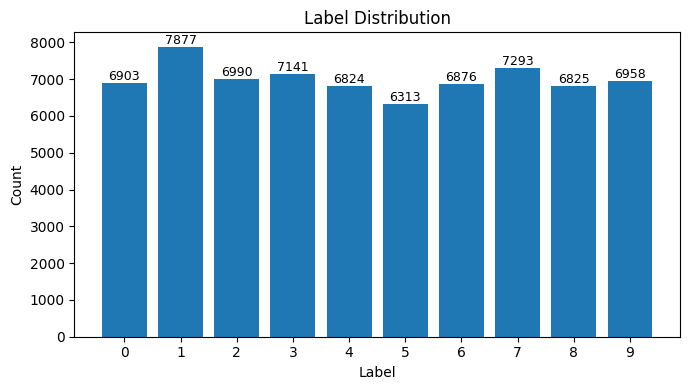

In [9]:
plot_distribution(labels_counts, unique_labels)

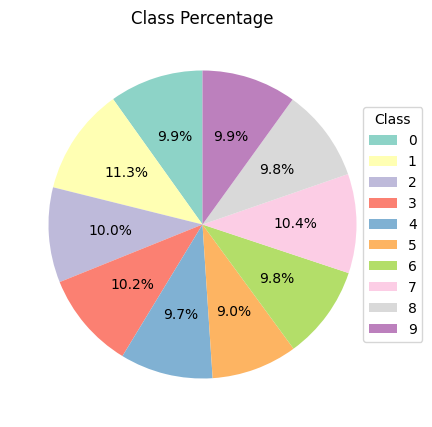

In [10]:
plot_percent(labels_counts, unique_labels)

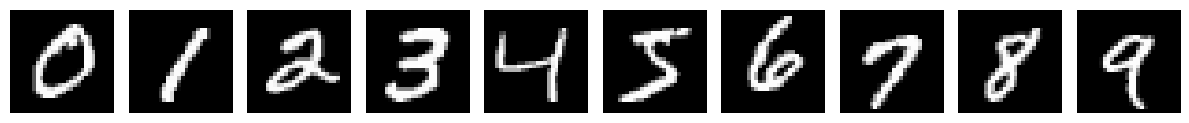

In [14]:
indices = [np.where(labels == i)[0][0] for i in range(10)]
show_mnist_image(images[indices], unique_labels)